I'm using the "Box office of DC and Marvel superhero movies" dataset (link below). I want to explore how different factors affect the box office performance of different superhero movies. My research questions are
1. Does the MPAA rating have significantly fifferent Box Office?
2. Do higher critics score correlate with higher box office?
3. Do Male led superhero movies have significantly different box office performaces
https://www.kaggle.com/datasets/mdtoomey/box-office-of-dc-and-marvel-superhero-movies

In [60]:
import pandas as pd
import warnings
#Warning will appear due to the way I replaced elements in the dataframe that I need to ignore
warnings.filterwarnings('ignore') 
warnings.warn('A value is trying to be set on a copy of a slice from a DataFrame') 
#Load csv file that contains critical and financial performance of Superhero films
movies = pd.read_csv('Superhero.csv')
#Create a dataframe narrowing the columns to certain areas of interest
df = movies[['MPAA Rating','Male/Female-led','Rotten Tomatoes Critic Score','Inflation Adjusted Worldwide Gross']]
df = df.drop(113)
#Replace strings in gross box office with their numerical value
index = 0
for x in df['Inflation Adjusted Worldwide Gross']:
    df['Inflation Adjusted Worldwide Gross'][index] = x.replace(',','')
    df['Inflation Adjusted Worldwide Gross'][index] = df['Inflation Adjusted Worldwide Gross'][index].replace('$','')
    df['Inflation Adjusted Worldwide Gross'][index] = float(df['Inflation Adjusted Worldwide Gross'][index])
    index+=1
#Results
df.head()

,MPAA Rating,Male/Female-led,Rotten Tomatoes Critic Score,Inflation Adjusted Worldwide Gross
0,PG,Male,94.0,1404237104.0
1,PG,Male,83.0,725336273.0
2,PG,Male,29.0,245506947.0
3,PG,Female,8.0,41926345.0
4,PG,Male,13.0,37962774.0


Axes(0.1,0.15;0.8x0.75)
PG vs PG-13  TtestResult(statistic=-2.160494628261146, pvalue=0.03319759256143041, df=97.0)
PG=13 vs R  TtestResult(statistic=2.224300557467105, pvalue=0.028423181849236184, df=98.0)
PG vs R  TtestResult(statistic=-0.021350650673065682, pvalue=0.9831354377255027, df=25.0)


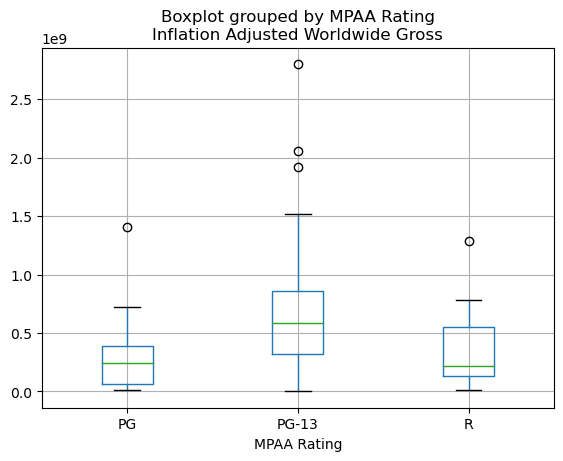

In [83]:
#Question 1 MPAA Ratings and Box Office Performance. Is there a difference?
from scipy.stats import ttest_ind
#First separate the dataframe into 3 different series for each MPAA ratings box office
#Convert to list to avoid error
pg = list(df.groupby('MPAA Rating')['Inflation Adjusted Worldwide Gross'].get_group('PG'))
pgt = list(df.groupby('MPAA Rating')['Inflation Adjusted Worldwide Gross'].get_group('PG-13'))
r = list(df.groupby('MPAA Rating')['Inflation Adjusted Worldwide Gross'].get_group('R'))
#Boxplots for each MPAA Ratings Box Office
print(df.boxplot(column='Inflation Adjusted Worldwide Gross',by='MPAA Rating'))
#Perform 3 t-tests to see if there's a difference in the ratings
print('PG vs PG-13 ',ttest_ind(pg,pgt))
print('PG=13 vs R ',ttest_ind(pgt,r))
print('PG vs R ',ttest_ind(pg,r))

Using a threshold of alpha=0.05. There's a significant difference between PG-13 and PG, as well as PG-13 and R. However, there's no signicant difference between R rated and PG rated superhero films. THe box plot shows that the average box office is higher for PG-13 films than PG and R films.

Slope: 9069037.67232334 
Intercept: 22333020.431494117 
r: 0.523474886241252 
p: 2.696939217999701e-09 
SE: 1401084.769001402 
r-sq: 0.27402595652529177


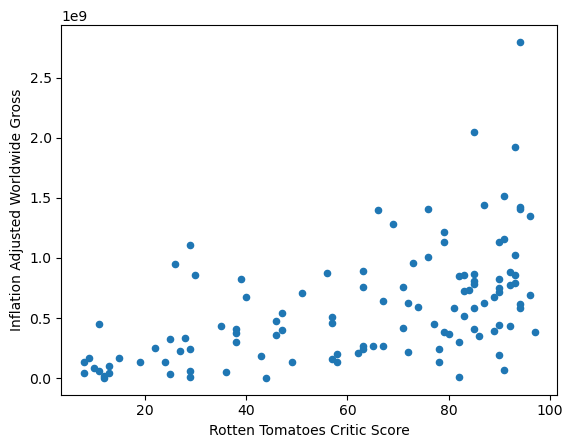

In [93]:
#Question 2 do superhero movies box office correlate positively with critics score
import scipy.stats as sci
#Convert columns to list and store in vatiables
x = list(df['Rotten Tomatoes Critic Score'])
y = list(df['Inflation Adjusted Worldwide Gross'])
#Create a scatter plot comparing Rotten Tomatoes Score and Bpx Office 
df.plot.scatter(x='Rotten Tomatoes Critic Score',y='Inflation Adjusted Worldwide Gross')
#Print the correlation and p-value between Rotten Tomatoes Scores and Box Office
slope, intercept, r_value, p_value, std_err = sci.linregress(x, y)
rsq = r_value**2
print('Slope:',slope,'\nIntercept:', intercept,'\nr:', r_value, '\np:',p_value, '\nSE:',std_err, '\nr-sq:',rsq)

There's a weak positive correlation coefficient but a stron p-value. This means that for superhero movies there's significant evidence that a 1% higher rotten tomatoes score predicts a $9,069,037 higher bpx office 27% of the time

Axes(0.1,0.15;0.8x0.75)
TtestResult(statistic=1.6961889988027932, pvalue=0.09275771904441626, df=107.0)


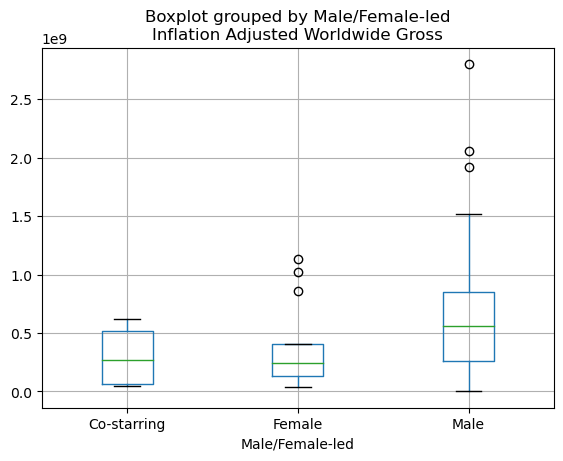

In [96]:
#Make two lists similar to Question 1
male = list(df.groupby('Male/Female-led')['Inflation Adjusted Worldwide Gross'].get_group('Male'))
female = list(df.groupby('Male/Female-led')['Inflation Adjusted Worldwide Gross'].get_group('Female'))
#Create two boxplots comparing the box office of male and female led films
print(df.boxplot(column='Inflation Adjusted Worldwide Gross',by='Male/Female-led'))
#Perform a t-test to see if there's a significant difference
print(ttest_ind(male,female))

While the average male-led superhero film has a higher average box office, there's not a statistically significant difference between the two using the threshold alpha=0.05